In [17]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [18]:
import pandas as pd
output_path = '/Users/Hesham/dev/fluffDecoder/data/'
p = pd.read_csv(output_path + 'ST1505558269_1.0.csv')

In [19]:
p = p.drop(['date', 'window'], axis=1).astype(float)


In [20]:
p.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1.542201e+09,0.11,0.14,-0.22,0.32,-10.00,0.32,-0.07,11.22,-0.56,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
1,1.542201e+09,0.11,0.02,-0.22,0.02,-10.02,0.02,-0.07,0.03,-0.56,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
2,1.542201e+09,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,-0.56,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
3,1.542201e+09,0.11,0.02,-0.21,0.02,-10.02,0.02,-0.07,0.02,-0.56,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0
4,1.542201e+09,0.11,0.02,-0.21,0.02,-10.01,0.02,-0.07,0.02,-0.56,...,3.0,0.0,6.0,90.0,90.0,0.0,0.0,30.0,3.0,4.0


In [21]:
# y = p[['phq_1']]
# t1, t2 = train_test_split(p, stratify=y, test_size=0.5, random_state=42, shuffle=True)

In [22]:
len(t1.index)

98187

In [23]:
# train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [46]:
y = p[['phq_1']]
train_set_st, test_set_st = train_test_split(p, stratify=y, test_size=0.25, random_state=42, shuffle=True)

In [47]:
train_set_st.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
43001,1.547367e+09,6.54,4.76,0.34,5.69,4.46,5.69,-1.08,85.47,-1.44,...,5.0,0.0,8.0,0.0,0.0,60.0,0.0,0.0,5.0,4.0
191389,1.567616e+09,9.92,0.02,-0.85,0.02,0.93,0.02,-0.07,0.03,-0.49,...,3.0,0.0,3.0,20.0,84.0,60.0,0.0,0.0,2.0,2.0
50115,1.548544e+09,5.72,1.31,-4.46,2.57,6.76,2.57,0.84,63.10,-0.07,...,4.0,1.0,4.0,38.0,68.0,0.0,0.0,0.0,5.0,3.0
69839,1.550468e+09,0.81,2.43,-5.77,2.26,2.33,2.26,-0.07,32.47,-0.56,...,6.0,1.0,7.0,20.0,20.0,60.0,0.0,0.0,8.0,7.0
155762,1.563053e+09,-5.62,2.04,-0.16,3.67,6.84,3.67,-0.14,27.13,-1.75,...,5.0,0.0,2.0,43.0,80.0,0.0,0.0,0.0,2.0,1.0


In [48]:
X_train_st = train_set_st.loc[:,'accX':'work_time']
y_train_st_1 = train_set_st.loc[:, ['phq_1']].values.ravel()
# y_train_st_2 = train_set_st.loc[:, ['phq_2']].values.ravel()

X_test_st = test_set_st.loc[:,'accX':'work_time']
y_test_st_1 = test_set_st[['phq_1']].values.ravel()
# y_test_st_2 = test_set_st[['phq_2']].values.ravel()

In [79]:
X_train_st.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure', 'AP_std',
       'PlethysmogramGreen', 'ple_std', 'alc', 'cig', 'mood', 'tense', 'tired',
       'period', 'rumination', 'socialize', 'socialize_val', 'sport_time',
       'work_time'],
      dtype='object')

In [49]:
time_st = train_set_st[['time']].values.ravel()
time_st_test = test_set_st[['time']].values.ravel()

In [50]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()
X_train_st_scaled = scaler_st.fit_transform(X_train_st)
X_test_st_scaled = scaler_st.transform(X_test_st)

In [102]:
X_test_st_scaled.ll

<function ndarray.all>

In [31]:
parameters = {'epsilon':[0,0.1,0.2,0.5,1],
               'tol':[1e-1, 1e-3,1e-5],
              'C':[1, 1.5, 10, 50]
              }

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

svr = LinearSVR(random_state=42)
regressor_st = GridSearchCV(svr, parameters, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error')
regressor_st

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [33]:
regressor_st.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [34]:
regressor_st.best_params_

{'C': 1, 'epsilon': 0, 'tol': 1e-05}

In [35]:
regressor_st.best_estimator_

LinearSVR(C=1, dual=True, epsilon=0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=1e-05, verbose=0)

In [36]:
from sklearn.metrics import mean_absolute_error

pred_test_st = regressor_st.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

0.9987886243241471

In [37]:
pred_train_st = regressor_st.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

0.994952804347976

In [38]:
model = regressor_st.best_estimator_

In [39]:
model.coef_

array([-0.02613018, -0.01627495, -0.01460241,  0.02667691, -0.00654916,
        0.02667691, -0.01291052, -0.00795607, -0.03018236, -0.0026919 ,
       -0.01535292, -0.02927621, -0.08393397,  0.01523976, -0.16845249,
        0.02123021, -0.02017612,  0.00153619, -0.04027949, -0.01290057,
       -0.09764914,  0.03212126, -0.8087615 ,  0.19219864,  0.00696997,
        0.11826604,  0.50264896,  0.18851879, -0.20638052, -0.29436391,
        0.        ])

In [137]:
cvrs = regressor_st.cv_results_
for mean_score, params in zip(cvrs['mean_train_score'], cvrs['params']):
#     print(mean_score, params)

SyntaxError: unexpected EOF while parsing (<ipython-input-137-4f5e15d2ba2b>, line 3)

In [51]:
svr = LinearSVR(random_state=42, tol=1e-05)
svr.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=1e-05, verbose=0)

In [54]:
pred_test_st = svr.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

1.0003729755803323

In [55]:
pred_train_st = svr.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

0.9981467247267135

In [78]:
svr.coef_

array([-0.02477377, -0.01005535, -0.01033519,  0.02772651, -0.00344182,
        0.02772651, -0.01724052, -0.03320568, -0.02449658,  0.00361274,
       -0.00317472, -0.03227624, -0.0786224 ,  0.0171121 , -0.16656135,
        0.02450968, -0.02818772,  0.00130163, -0.04109102, -0.00210225,
       -0.08843782,  0.03276362, -0.79831237,  0.20418064,  0.00800336,
        0.11781184,  0.49926571,  0.17982042, -0.19853483, -0.3067323 ,
        0.        ])

In [56]:
temp = p.columns[1:-2]

In [57]:
coef = svr.coef_
for c, col in zip(coef, temp):
    print(c, col)

-0.024773774359680024 accX
-0.010055350333579165 accX_std
-0.010335185007196667 accY
0.02772651223520637 accY_std
-0.0034418221331009038 accZ
0.02772651223520637 accZ_std
-0.01724052180516089 gyrX
-0.03320568250736278 gyrX_std
-0.02449657545844 gyrY
0.0036127357863772963 gyrY_std
-0.0031747218968106866 gyrZ
-0.03227623542568557 gyrZ_std
-0.07862240485357479 heartR
0.017112096935961406 heartR_std
-0.16656134562794303 AirTemperature
0.024509676241430876 AT_std
-0.02818772226279683 AirPressure
0.0013016257033239699 AP_std
-0.04109102014119421 PlethysmogramGreen
-0.0021022545837792745 ple_std
-0.08843782208095127 alc
0.03276362261170666 cig
-0.7983123668211671 mood
0.20418064383853166 tense
0.008003362063861512 tired
0.11781183930989766 period
0.499265710296464 rumination
0.1798204175810991 socialize
-0.19853482972816153 socialize_val
-0.3067322989167699 sport_time
0.0 work_time


In [88]:
new_p = patient.insert(1, "predictions", pred_train_st)

ValueError: cannot insert predictions, already exists

In [91]:
patient

,time,predictions,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,...,tired,period,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
43001,1.547367e+09,5.690581,6.54,4.76,0.34,5.69,4.46,5.69,-1.08,85.47,...,5.0,0.0,8.0,0.0,0.0,60.0,0.0,0.0,5.0,4.0
191389,1.567616e+09,2.852379,9.92,0.02,-0.85,0.02,0.93,0.02,-0.07,0.03,...,3.0,0.0,3.0,20.0,84.0,60.0,0.0,0.0,2.0,2.0
50115,1.548544e+09,4.720703,5.72,1.31,-4.46,2.57,6.76,2.57,0.84,63.10,...,4.0,1.0,4.0,38.0,68.0,0.0,0.0,0.0,5.0,3.0
69839,1.550468e+09,6.552510,0.81,2.43,-5.77,2.26,2.33,2.26,-0.07,32.47,...,6.0,1.0,7.0,20.0,20.0,60.0,0.0,0.0,8.0,7.0
155762,1.563053e+09,3.799532,-5.62,2.04,-0.16,3.67,6.84,3.67,-0.14,27.13,...,5.0,0.0,2.0,43.0,80.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103968,1.555890e+09,4.070240,1.46,0.24,-10.16,0.40,-0.36,0.40,0.28,12.64,...,3.0,0.0,5.0,45.0,80.0,0.0,0.0,0.0,4.0,2.0
2200,1.542476e+09,3.360489,0.81,2.43,-5.77,2.26,2.33,2.26,-0.07,32.47,...,3.0,0.0,4.0,26.0,70.0,60.0,0.0,0.0,5.0,4.0
91870,1.554701e+09,5.592977,-2.45,2.99,-9.18,2.27,-0.35,2.27,-1.82,55.15,...,3.0,0.0,6.0,0.0,0.0,30.0,0.0,0.0,8.0,7.0
26859,1.545486e+09,3.907879,0.39,0.12,-8.21,0.46,5.72,0.46,-0.28,4.40,...,7.0,0.0,2.0,20.0,57.0,0.0,0.0,155.0,5.0,4.0


In [58]:
patient = train_set_st.copy()

In [68]:
patient.columns

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'AirTemperature', 'AT_std', 'AirPressure', 'AP_std',
       'PlethysmogramGreen', 'ple_std', 'alc', 'cig', 'mood', 'tense', 'tired',
       'period', 'rumination', 'socialize', 'socialize_val', 'sport_time',
       'work_time', 'day_sleep', 'phq_1', 'phq_2'],
      dtype='object')

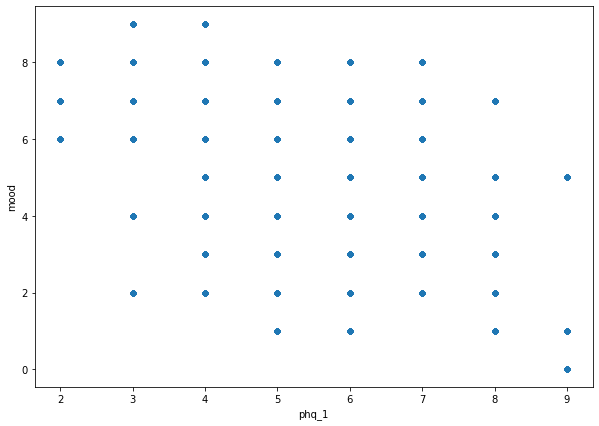

In [64]:
patient.plot(kind='scatter', x='phq_1', y='mood', figsize=(10,7))

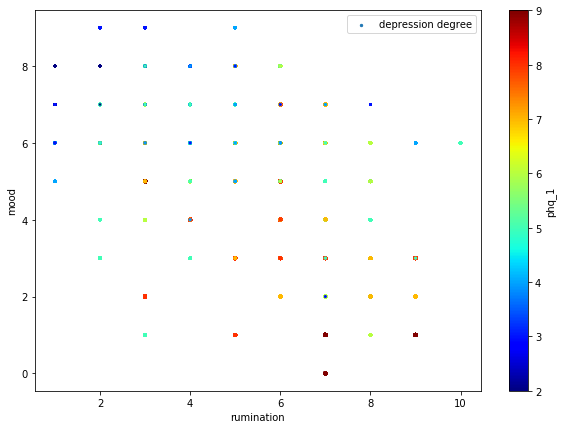

In [66]:
from matplotlib import pyplot

patient.plot(kind='scatter', x='rumination', y='mood', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

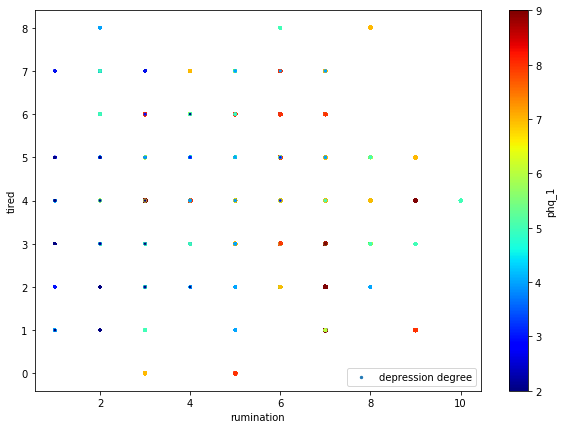

In [83]:
patient.plot(kind='scatter', x='rumination', y='tired', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

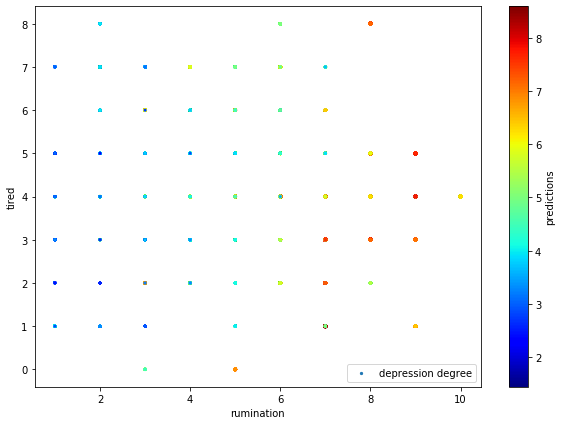

In [93]:
patient.plot(kind='scatter', x='rumination', y='tired', s=patient['predictions'], label='depression degree', 
             c='predictions', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [62]:
corr_matrix = patient.corr()

In [63]:
corr_matrix['phq_1'].sort_values(ascending=False)

phq_1                 1.000000
phq_2                 0.652304
rumination            0.504079
day_sleep             0.159071
cig                   0.025054
tired                 0.016711
accY_std              0.013757
accZ_std              0.013757
heartR_std            0.013188
ple_std               0.012004
AP_std                0.011290
accZ                  0.005013
accX_std              0.004328
AT_std                0.001756
AirPressure          -0.000995
PlethysmogramGreen   -0.003086
heartR               -0.004042
gyrX                 -0.009207
gyrY_std             -0.016490
accX                 -0.021281
gyrZ                 -0.024106
gyrX_std             -0.027640
period               -0.029244
gyrZ_std             -0.031487
gyrY                 -0.035639
accY                 -0.044889
alc                  -0.120043
socialize            -0.173265
tense                -0.189985
AirTemperature       -0.193887
sport_time           -0.248062
socialize_val        -0.360012
time    

In [74]:
socialise_scaled = scaler_st.fit_transform(test_set_st[['socialize']])
socialize_val_scaled = scaler_st.fit_transform(test_set_st[['socialize_val']])
work_time_scaled = scaler_st.fit_transform(test_set_st[['work_time']])
mood_scaled = scaler_st.fit_transform(test_set_st[['mood']])
tense_scaled = scaler_st.fit_transform(test_set_st[['tense']])
rumination_scaled = scaler_st.fit_transform(test_set_st[['rumination']])

In [70]:
time_sorted = time_st_test
time_sorted.sort()

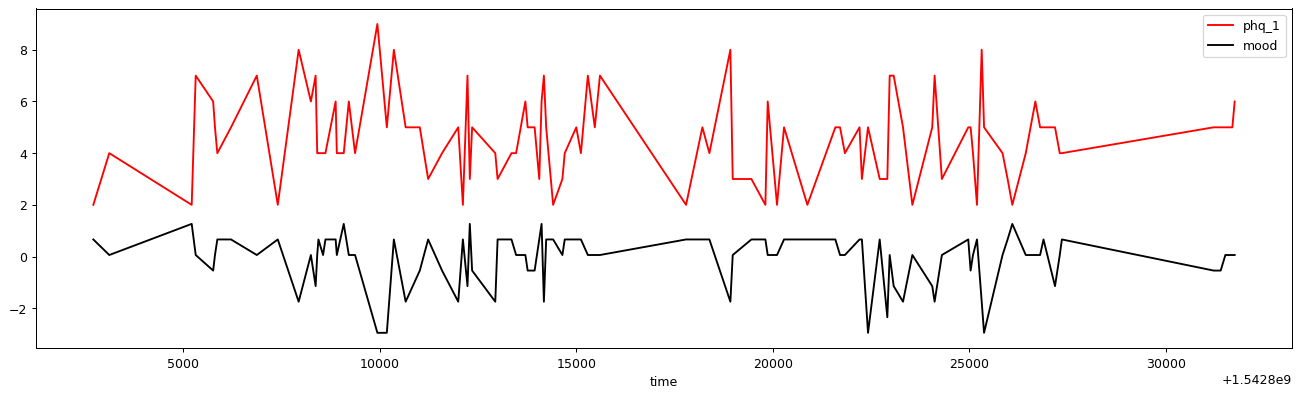

In [81]:
%matplotlib inline
s = 1000
e = 1100
xaxis = time_sorted[s:e]
yaxis = y_test_st_1[s:e]
yaxis2 = pred_test_st[s:e]
yaxis3 = socialise_scaled[s:e]
yaxis4 = socialize_val_scaled[s:e]
yaxis5 = work_time_scaled[s:e]
yaxis6 = mood_scaled[s:e]
yaxis7 = tense_scaled[s:e]
yaxis8 = rumination_scaled[s:e]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
# pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
# pyplot.plot(xaxis, yaxis3, color='green', label='socialize')
# pyplot.plot(xaxis, yaxis4, color='cyan', label='socialize_val')
# pyplot.plot(xaxis, yaxis5, color='magenta', label='sport_time')
pyplot.plot(xaxis, yaxis6, color='black', label='mood')
# pyplot.plot(xaxis, yaxis7, color='blue', label='tense')
# pyplot.plot(xaxis, yaxis8, color='blue', label='rumination')
# plt.ylabel('some numbers')
pyplot.xlabel('time')

pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

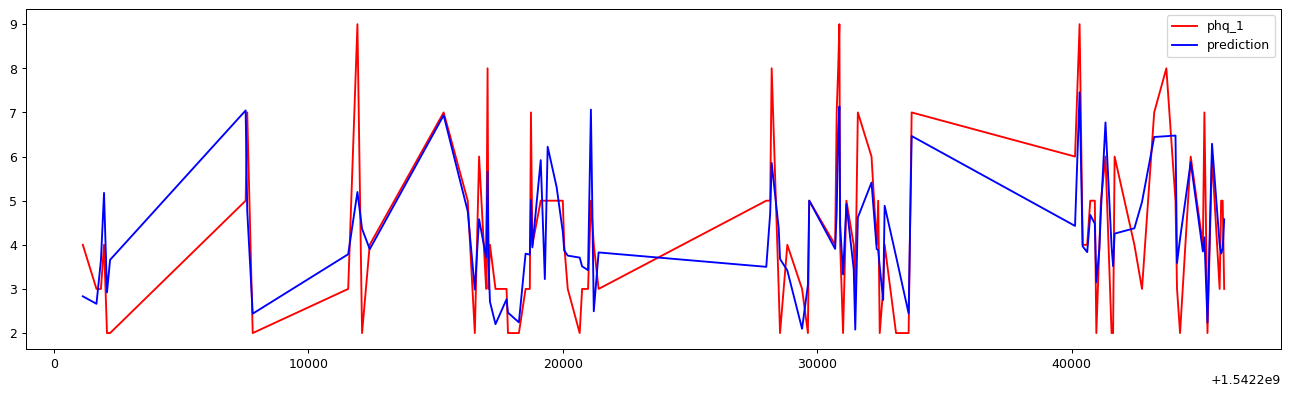

In [77]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:100]
yaxis = y_test_st_1[:100]
yaxis2 = pred_test_st[:100]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

In [82]:
len(X_train_st.columns)

31